# Heteroscedasticity in python
> Use of statsmodel 

In [ ]:
import pandas as pd
import numpy as np
from random import random

# Homoscedastic data

In [108]:
X = []
Y = []
for i in range(300):
    x = random()
    c = random() + 1*random()
    y = 5*x + 3*c
    X.append(x)
    Y.append(y)

data = pd.DataFrame(columns = ['X','Y'])
data.X = X
data.Y = Y
data

,X,Y
0,0.556561,6.726886
1,0.863728,7.319267
2,0.290025,4.498806
3,0.519170,8.242732
4,0.823742,8.299956
...,...,...
295,0.677121,5.114706
296,0.446470,5.468886
297,0.108419,3.728836
298,0.397281,6.823616


In [109]:
#fit simple linear regression model
model = ols('Y ~ X', data=data).fit()
p = model.params

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     468.2
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           4.56e-63
Time:                        17:11:46   Log-Likelihood:                -461.78
No. Observations:                 300   AIC:                             927.6
Df Residuals:                     298   BIC:                             935.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0404      0.130     23.321      0.0

In [110]:
p

Intercept    3.040375
X            4.936788
dtype: float64

In [111]:
p.Intercept, p.X

(3.0403754853720484, 4.9367875427951295)

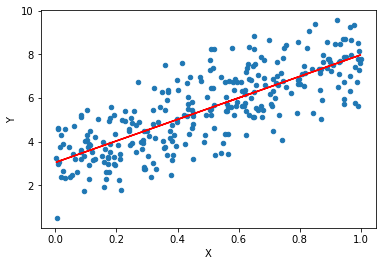

In [112]:
ax = data.plot(kind='scatter', x='X', y='Y')
ax.plot(X, p.Intercept + p.X*np.array(X),'r')

# Heteroscedastic data

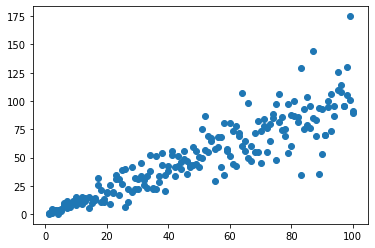

In [180]:
data = pd.read_excel('sample_heteroscedasticity_data.xlsx')
X = data['var1'] 
Y = data['var2']
plt.plot(X,Y,'o')

In [181]:
X

0        1
1        2
2        3
3        4
4        5
      ... 
195     96
196     97
197     98
198     99
199    100
Name: var1, Length: 200, dtype: int64

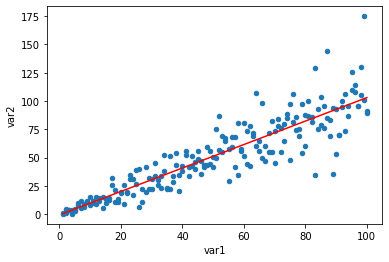

In [141]:
model = ols('Y ~ X', data=data).fit()
p = model.params

ax = data.plot(kind='scatter', x='var1', y='var2')
ax.plot(X, p.Intercept + p.X*np.array(X),'r')

In [122]:
model = ols('Y ~ X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     786.2
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           7.18e-71
Time:                        17:16:54   Log-Likelihood:                -825.66
No. Observations:                 200   AIC:                             1655.
Df Residuals:                     198   BIC:                             1662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6606      2.151     -0.307      0.7

In [125]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

In [127]:
expr = 'var2~ var1'
y, X = dmatrices(expr, data, return_type='dataframe')

In [129]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(model.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 23.080654955447134),
 ("LM test's p-value:", 9.729700165356245e-06),
 ('F-statistic:', 12.850174821408205),
 ("F-test's p-value:", 5.680868506694736e-06)]

# Data Transformation

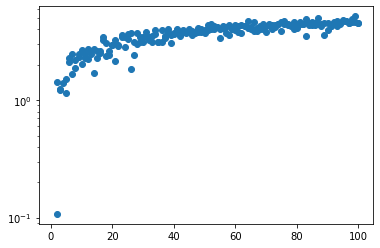

In [206]:
data = pd.read_excel('sample_heteroscedasticity_data.xlsx')
X = data['var1'] 
Y = np.log(data['var2'])
plt.plot(X,Y,'o')
plt.yscale("log")

In [207]:
dataX = pd.DataFrame(columns=['var1','var2'])
dataX.var1 = X
dataX.var2 = Y
dataX

,var1,var2
0,1,-0.473549
1,2,0.107743
2,3,1.254872
3,4,1.388049
4,5,1.511434
...,...,...
195,96,4.740987
196,97,4.555702
197,98,4.659135
198,99,5.164662


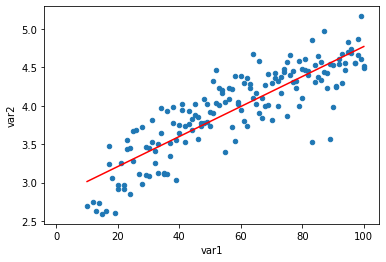

In [210]:
model = ols('var2 ~ var1', data=dataX).fit()
p = model.params
dataX = dataX[dataX['var2'] > 2.5]
ax = dataX.plot(kind='scatter', x='var1', y='var2')
ax.plot(X, p.Intercept + p.var1*np.array(X),'r')
# plt.yscale("log")

In [209]:
model = ols('var2 ~ var1', data=dataX).fit()
expr = 'var2~ var1'
y, X = dmatrices(expr, dataX, return_type='dataframe')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(model.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 1.5156231931616286),
 ("LM test's p-value:", 0.46869099048803),
 ('F-statistic:', 0.7510952808302751),
 ("F-test's p-value:", 0.4734461091533566)]